In [11]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  # Use higher quality images for molecules
import py3Dmol

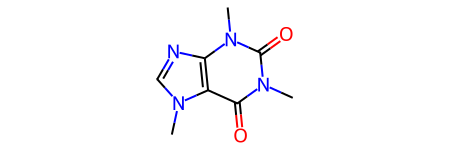

In [12]:
caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
rdCoordGen.AddCoords(caffeine)
caffeine

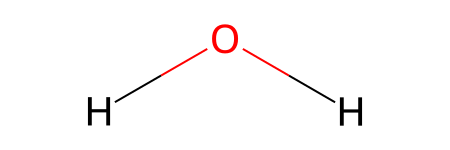

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Chem.rdCoordGen as rdCoordGen

# Manually create a water molecule (H2O)
water = Chem.RWMol()  # Create an editable molecule

# Add atoms: Oxygen (atomic number 8) and two Hydrogens (atomic number 1)
oxygen = water.AddAtom(Chem.Atom(8))  # Oxygen atom
hydrogen1 = water.AddAtom(Chem.Atom(1))  # Hydrogen atom
hydrogen2 = water.AddAtom(Chem.Atom(1))  # Another Hydrogen atom

# Add bonds: Oxygen-Hydrogen bonds
water.AddBond(oxygen, hydrogen1, Chem.BondType.SINGLE)
water.AddBond(oxygen, hydrogen2, Chem.BondType.SINGLE)

# Convert to a normal molecule object
water = water.GetMol()

# Explicitly compute valence & add hydrogens
Chem.SanitizeMol(water)
water = Chem.AddHs(water)

# Generate 2D coordinates
rdCoordGen.AddCoords(water)

# Display the molecule
water

In [17]:
def molecule_to_3d(molecule):
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

In [18]:
water_3d = molecule_to_3d(water)

view = py3Dmol.view(
    data=Chem.MolToMolBlock(water_3d),  # Convert the RDKit molecule for py3Dmol
    style={"stick": {}, "sphere": {"scale": 0.3}}
)
view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
import pandas as pd
from io import StringIO
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True  # Use higher quality images for molecules
import py3Dmol
from ipywidgets import interact, Dropdown